<a href="https://colab.research.google.com/github/dewshishir/S_M/blob/main/Skill_Morph_ML_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression & Classification with Machine Learning

**Topics:** Linear Regression, Logistic Regression, Support Vector Machine (SVM)

**Instructor:** Md. Samiul Islam  
**Organization:** Skill Morph Research Lab

## 1. Setup and Import Libraries

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix

print("Libraries imported successfully!")

Mounted at /content/drive
Libraries imported successfully!


## 2. Load and Explore Dataset
Loading the Housing dataset and checking basic information.

In [3]:
# Load dataset
df = pd.read_csv('/content/Housing.csv')

# Display first few rows
print("First 5 rows:")
print(df.head())

# Dataset information
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 54

## 3. Data Preprocessing
Converting categorical variables and handling missing values.

In [ ]:
# Drop any missing values
df = df.dropna()

# Convert yes/no columns to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Convert furnishingstatus to numeric
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

print("Data preprocessing completed!")
print(df.head())

Data preprocessing completed!
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 

## 4. Feature Selection and Target Definition
Selecting features (X) and target variable (y) for modeling.

In [ ]:
# Select features
X = df.drop('price', axis=1)

# Target for Linear Regression (continuous price)
y_regression = df['price']

# Target for Classification (binary: 1 if price > median, 0 otherwise)
median_price = df['price'].median()
y_classification = (df['price'] > median_price).astype(int)

print(f"Features shape: {X.shape}")
print(f"Regression target shape: {y_regression.shape}")
print(f"Classification target distribution:\n{y_classification.value_counts()}")

Features shape: (545, 12)
Regression target shape: (545,)
Classification target distribution:
price
0    275
1    270
Name: count, dtype: int64


## 5. Train-Test Split
Splitting data into 80% training and 20% testing sets.

In [ ]:
# Split for Linear Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

# Split for Classification (Logistic Regression & SVM)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_reg.shape[0]}")
print(f"Testing set size: {X_test_reg.shape[0]}")

Training set size: 436
Testing set size: 109


## 6. Linear Regression
Predicting continuous house prices.

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_lr = lr_model.predict(X_test_reg)

# Evaluate
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))

print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:,.2f}")

Linear Regression Results:
Mean Absolute Error (MAE): 979,679.69
Root Mean Squared Error (RMSE): 1,331,071.42


## 7. Logistic Regression
Classifying houses as high-priced or low-priced.

In [ ]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_log = log_model.predict(X_test_clf)

# Evaluate
acc_log = accuracy_score(y_test_clf, y_pred_log)
cm_log = confusion_matrix(y_test_clf, y_pred_log)

print("Logistic Regression Results:")
print(f"Accuracy: {acc_log:.4f}")
print(f"\nConfusion Matrix:\n{cm_log}")

Logistic Regression Results:
Accuracy: 0.8257

Confusion Matrix:
[[45  6]
 [13 45]]


## 8. Support Vector Machine (SVM)
Using SVM with linear kernel for classification.

In [ ]:
# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_svm = svm_model.predict(X_test_clf)

# Evaluate
acc_svm = accuracy_score(y_test_clf, y_pred_svm)
cm_svm = confusion_matrix(y_test_clf, y_pred_svm)

print("SVM Results:")
print(f"Accuracy: {acc_svm:.4f}")
print(f"\nConfusion Matrix:\n{cm_svm}")

SVM Results:
Accuracy: 0.8073

Confusion Matrix:
[[41 10]
 [11 47]]


## 9. Visualizations

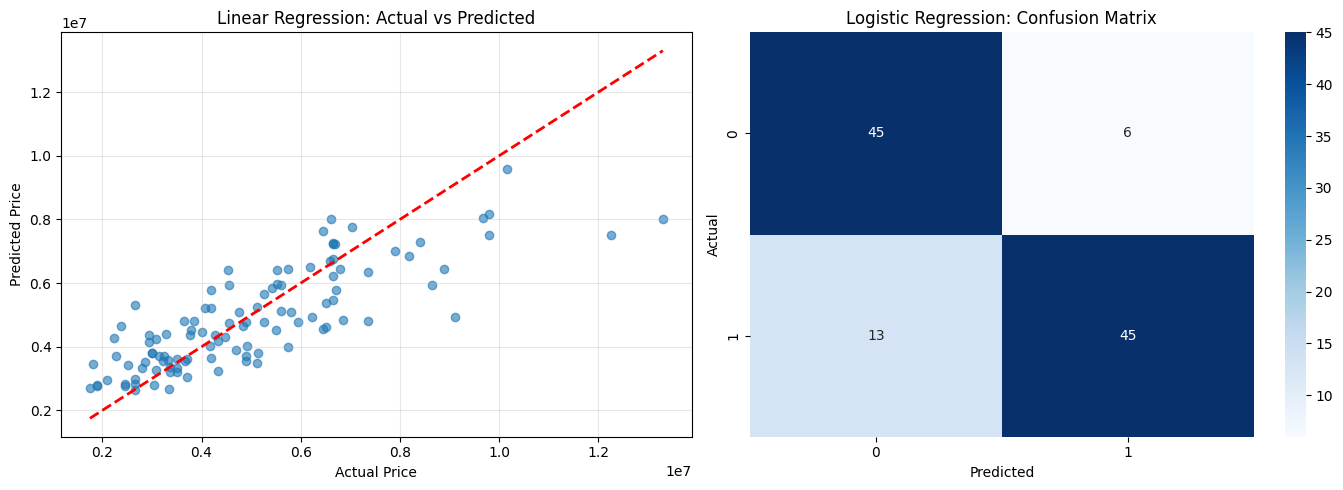

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted (Linear Regression)
axes[0].scatter(y_test_reg, y_pred_lr, alpha=0.6)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Linear Regression: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion Matrix (Logistic Regression)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Logistic Regression: Confusion Matrix')

plt.tight_layout()
plt.show()

## 10. Model Comparison Summary

In [ ]:
print("="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print("\n1. LINEAR REGRESSION (Regression Task)")
print(f"   - MAE: {mae_lr:,.2f}")
print(f"   - RMSE: {rmse_lr:,.2f}")
print(f"   - Use when: Predicting continuous values\n")

print("2. LOGISTIC REGRESSION (Classification Task)")
print(f"   - Accuracy: {acc_log:.4f}")
print(f"   - Use when: Binary classification with linear boundaries\n")

print("3. SUPPORT VECTOR MACHINE (Classification Task)")
print(f"   - Accuracy: {acc_svm:.4f}")
print(f"   - Use when: Complex decision boundaries needed")
print("="*60)

MODEL COMPARISON SUMMARY

1. LINEAR REGRESSION (Regression Task)
   - MAE: 979,679.69
   - RMSE: 1,331,071.42
   - Use when: Predicting continuous values

2. LOGISTIC REGRESSION (Classification Task)
   - Accuracy: 0.8257
   - Use when: Binary classification with linear boundaries

3. SUPPORT VECTOR MACHINE (Classification Task)
   - Accuracy: 0.8073
   - Use when: Complex decision boundaries needed


## Assignment

Complete the following tasks to practice and improve your understanding:

**Task 1:** Change the train-test split ratio to 70-30 and report the performance metrics for all three models.

**Task 2:** Try using a different SVM kernel (rbf) instead of linear and compare the accuracy with the linear kernel.

**Task 3:** Add one new feature to the dataset (e.g., price per square foot = price/area) and observe how model performance changes.

In [15]:
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3       NaN        NaN   
1  12250000  8960         4          4        4       NaN        NaN   
2  12250000  9960         3          2        2       NaN        NaN   
3  12215000  7500         4          2        2       NaN        NaN   
4  11410000  7420         4          1        2       NaN        NaN   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0       NaN              NaN              NaN        2       NaN   
1       NaN              NaN              NaN        3       NaN   
2       NaN              NaN              NaN        2       NaN   
3       NaN              NaN              NaN        3       NaN   
4       NaN              NaN              NaN        2       NaN   

   furnishingstatus  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


In [16]:
df = df.dropna()

binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes':1,'no':0})

df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished':2,
    'semi-furnished':1,
    'unfurnished':0
})

print("Preprocessing done")
print(df.head())


Preprocessing done
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [12]:
# Features
X = df.drop("price", axis=1)

# Target for regression
y_reg = df["price"]

# Target for classification (High price = 1, Low price = 0)
median_price = df["price"].median()
y_clf = (df["price"] > median_price).astype(int)

print("Median price:", median_price)
print("Class distribution:\n", y_clf.value_counts())


Median price: 4340000.0
Class distribution:
 price
0    275
1    270
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

# Regression split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.30, random_state=42
)

# Classification split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.30, random_state=42
)

print("Training samples:", X_train_reg.shape[0])
print("Testing samples:", X_test_reg.shape[0])


Training samples: 381
Testing samples: 164


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

y_pred_lr = lr.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))

print("Linear Regression Results (70–30)")
print("MAE:", mae)
print("RMSE:", rmse)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values